In [1]:
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from make_da_plots import make_base_plots, make_wind_base_plots
import importlib
from plot_driver import da_base_plots
import time_series as time_series
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import xarray as xr

/lfs5/BMC/wrfruc/gge/miniconda3/4.6.14/envs/eva/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Interactive Plot Making

### Get date

Use current date and time (most recent hour) or put in your own custom time, note that these directories only have diagnostic files from today and the previous 2 days

In [8]:
variable = 't'
# Current time (most recent hour)
# now_utc = datetime.now(timezone.utc)
# ex_time = now_utc.replace(hour=0, minute=0, second=0, microsecond=0)
# date_str = ex_time.strftime('%Y%m%d%H')

# Custom time
date_str = '2024080814' 

In [9]:
day_str = date_str[:8]
hour_str = date_str[-2:]

### RTMA GSI diag file paths

In [10]:
#diag files on jet
rtma_diag_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_{variable}_ges.{date_str}.nc4.gz'
rtma_diag_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_{variable}_anl.{date_str}.nc4.gz'

### Query data
Print the total number of obs before filtering

In [12]:
rtma_diag_ges = Conventional(rtma_diag_ges_fp)
rtma_diag_anl = Conventional(rtma_diag_anl_fp)
rtma_df_ges = rtma_diag_ges.get_data()
rtma_df_anl = rtma_diag_anl.get_data()

In [13]:
print(len(rtma_df_ges))

130895


In [14]:
print(len(rtma_df_anl))

130895


## Filtering dataframes

### Set filter arguments
Here are various example filters that can be passed to filter_df, feel free to try adding or removing any

In [15]:
station_ids = ['NLOYR3BA']
obs_types_sur_temp = [181, 187, 188, 195]
obs_types_air_temp = [126, 133]
use = 1
elv_range = (0,20)
p_range = (500,1000)
err_range = (0, 4)

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (251, 258) #to convert from deg west to deg east (360 - deg west)

### Filter df
Filter the df and see how many obs you end up with, sometimes there are slight difference in number of obs between anl and ges dfs

In [16]:
# temp examples
# rtma_fil_dfs = filter_df([rtma_df_anl, rtma_df_ges], hem='CONUS', obs_types=obs_types_air_temp, use=1)
rtma_fil_dfs = filter_df([rtma_df_anl, rtma_df_ges], obs_types=obs_types_sur_temp, use=1,
                    lat_range=co_lats,lon_range=co_lons)
    
rtma_df_anl_fil = rtma_fil_dfs[0]
rtma_df_ges_fil = rtma_fil_dfs[1]
print(len(rtma_df_anl_fil))
print(len(rtma_df_ges_fil))

1628
1628


## Making base plots
Now run make_base_plots to create your plots, uncomment the top cell to save the plots as files. The returned object shared_norm is the normalization used for the scales of oma/omf maps, you can pass this to another call to make_base_plots if you want the same scale to be use for comparison purposes

In [ ]:
# make_base_plots([rtma_df_ges_fil, rtma_df_anl_fil], diag_ges.metadata, zoom=False, save_plots=True)

------------ Temperature Data Assimilation Statistics and Plots ------------




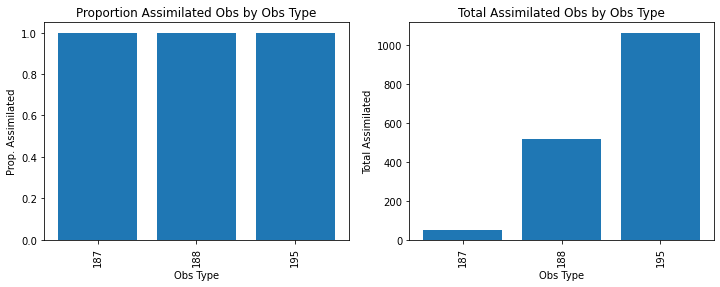

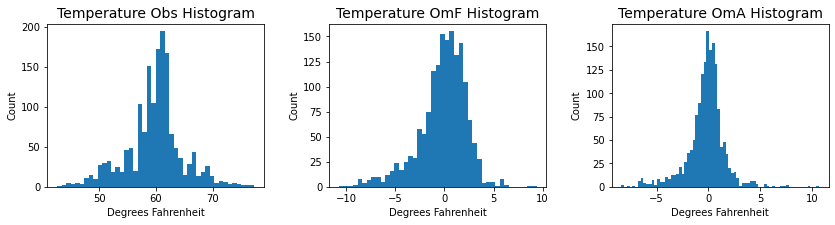

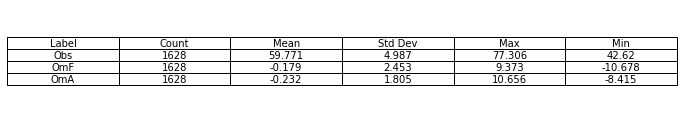

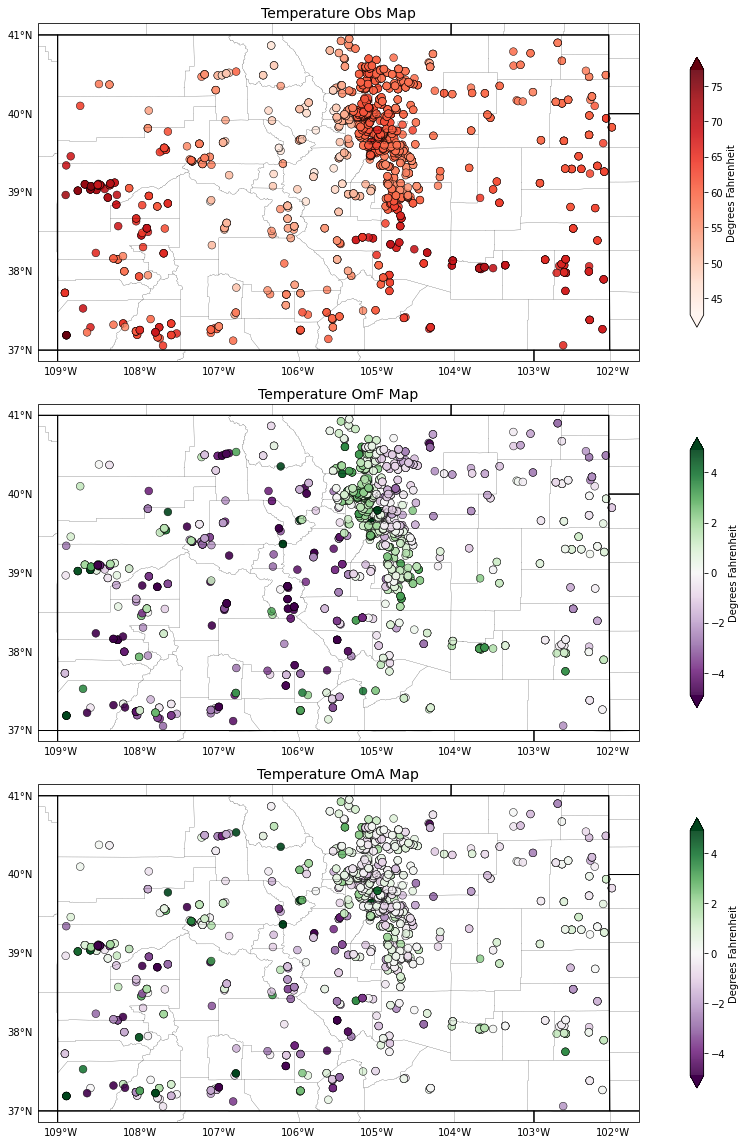

In [17]:
to_share_norm = make_base_plots([rtma_df_ges_fil, rtma_df_anl_fil], rtma_diag_ges.metadata, zoom=False)

# RRFS Diag Files
Now lets do the same process but with RRFS diag files

In [18]:
#temperature diag files jet
rrfs_diag_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod/rrfs.{day_str}/{hour_str}/diag_conv_{variable}_ges.{date_str}.nc4.gz'
rrfs_diag_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/v0.9.5/com/prod/rrfs.{day_str}/{hour_str}/diag_conv_{variable}_anl.{date_str}.nc4.gz'

## Query data
Print the total number of obs before filtering

In [19]:
rrfs_diag_ges = Conventional(rrfs_diag_ges_fp)
rrfs_diag_anl = Conventional(rrfs_diag_anl_fp)
rrfs_df_ges = rrfs_diag_ges.get_data()
rrfs_df_anl = rrfs_diag_anl.get_data()

In [20]:
print(len(rrfs_df_ges))

59313


In [21]:
print(len(rrfs_df_anl))

59313


## Filtering dataframes

### Filter df

In [22]:
# temp examples
# rrfs_fil_dfs = filter_df([rrfs_df_anl, rrfs_df_ges], use =1)
rrfs_fil_dfs = filter_df([rrfs_df_anl, rrfs_df_ges], obs_types=obs_types_sur_temp, use=1,
                    lat_range=co_lats,lon_range=co_lons)

rrfs_df_anl_fil = rrfs_fil_dfs[0]
rrfs_df_ges_fil = rrfs_fil_dfs[1]
print(len(rrfs_df_anl_fil))
print(len(rrfs_df_ges_fil))

402
402


### Make plots
Here we pass the to_share_norm that was returned by the make_base_plots we called for RTMA, this will cause the plots created for RRFS to have the same scale for the oma and omf plots

In [23]:
# make_base_plots([rrfs_df_ges_fil, rrfs_df_anl_fil], diag_ges.metadata, shared_norm = to_share_norm, save_plots=True, zoom=True)

------------ Temperature Data Assimilation Statistics and Plots ------------




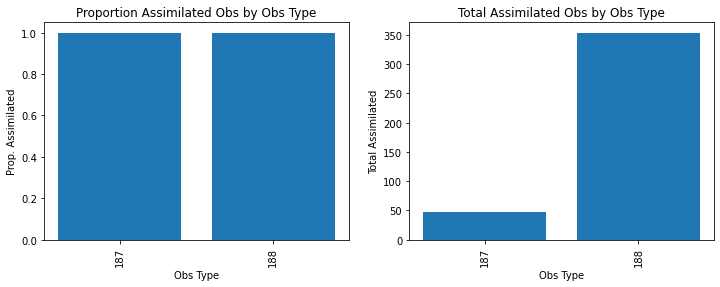

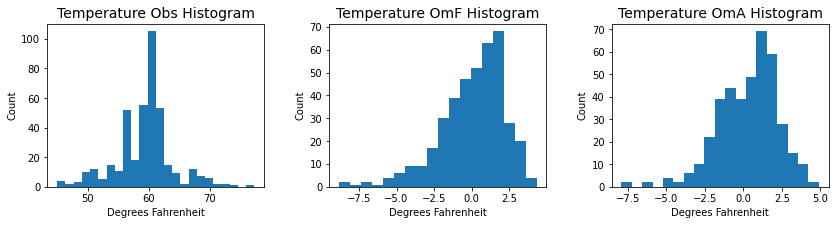

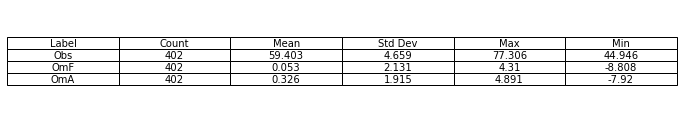

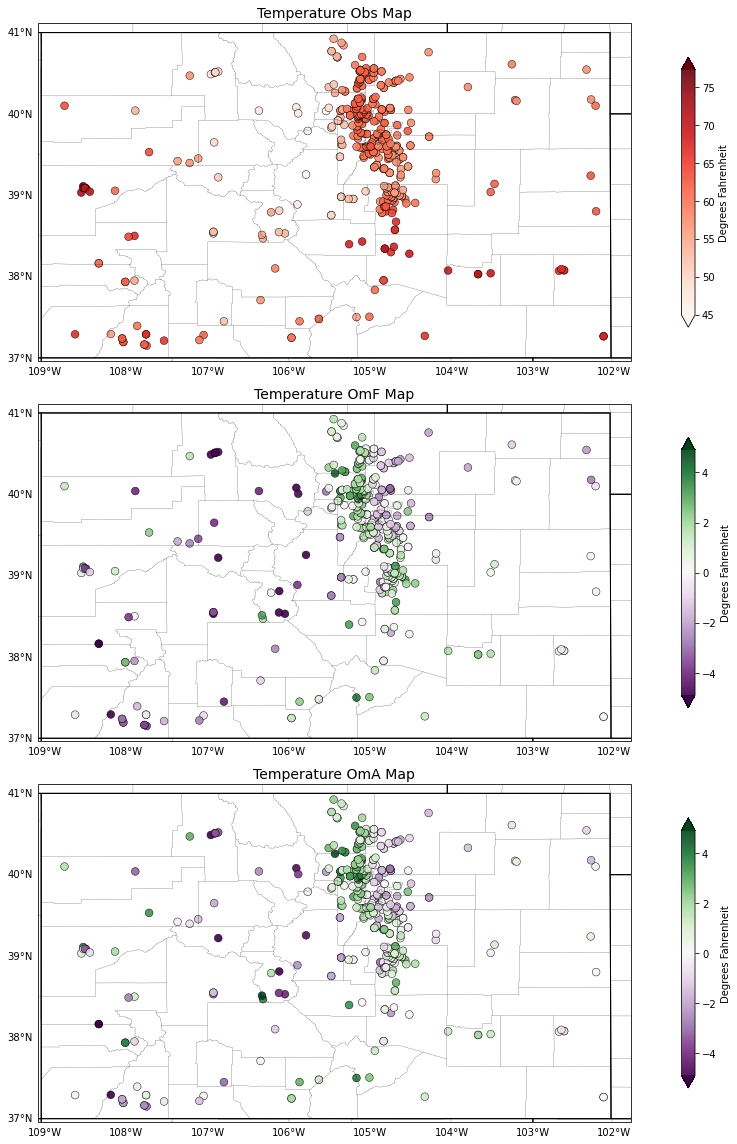

In [24]:
make_base_plots([rrfs_df_ges_fil, rrfs_df_anl_fil], rrfs_diag_ges.metadata, shared_norm = to_share_norm, zoom=False)

## Wind plots
Wind plots require a slightly different process due to the different format with u and v components, here is an example making base plots for RTMA wind diagnostic data

In [25]:
#wind diag files on jet
diag_uv_ges_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_uv_ges.{date_str}.nc4.gz'
diag_uv_anl_fp = f'/lfs4/BMC/nrtrr/NCO_dirs/rtma.v0.8.8/com/prod/RTMA_CONUS.{day_str}/{hour_str}/diag_conv_uv_anl.{date_str}.nc4.gz'

In [27]:
#Wind Diag file
diag_uv_ges = Conventional(diag_uv_ges_fp)
diag_uv_anl = Conventional(diag_uv_anl_fp)
df_uv_ges = diag_uv_ges.get_data()
df_uv_anl = diag_uv_anl.get_data()

In [28]:
df_uv_anl

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,prep_qc_mark,setup_qc_mark,nonlinear_qc_var_jb,prep_use_flag,analysis_use_flag,nonlinear_qc_rel_wgt,errinv_input,errinv_adjust,error,wind_reduction_factor_at_10m,u_observation,u_omf_adjusted,u_omf_unadjusted,v_observation,v_omf_adjusted,v_omf_unadjusted,dominant_sfc_type,model_terrain,u_hofx_unadjusted,u_hofx_adjusted,v_hofx_unadjusted,v_hofx_adjusted
0,IR270,uv,245,0,21.290751,236.342499,110087.0,245.600006,63.0,-1.00,15.0,1.000000e+09,0.0,100.0,0.0,4.0,5.000000e-01,5.000000e-01,2.938736e-39,1.0,-9.198599,3.225139,3.225139,-0.160562,3.821941,3.821941,0.0,0.000000,-12.423738,-12.423738,-3.982503,-3.982503
1,IR270,uv,245,0,21.110090,237.058350,110054.0,233.100006,49.0,-1.00,15.0,1.000000e+09,0.0,100.0,0.0,4.0,5.000000e-01,5.000000e-01,5.000000e-01,1.0,-3.456909,2.708620,2.708620,0.547521,-2.366359,-2.366359,0.0,0.000000,-6.165529,-6.165529,2.913879,2.913879
2,IR270,uv,245,0,20.644270,237.592438,110045.0,233.399994,39.0,-1.00,15.0,1.000000e+09,0.0,100.0,0.0,4.0,5.000000e-01,5.000000e-01,2.938736e-39,1.0,-1.235832,4.251510,4.251510,7.802738,3.281608,3.281608,0.0,0.000000,-5.487342,-5.487342,4.521130,4.521130
3,IR270,uv,245,0,22.408291,237.433395,110093.0,217.899994,72.0,-1.00,2.0,1.000000e+09,0.0,0.0,1.0,4.0,5.000000e-01,5.000000e-01,5.000000e-01,1.0,-14.480128,1.085171,1.085171,0.758871,-1.525660,-1.525660,0.0,0.000000,-15.565299,-15.565299,2.284531,2.284531
4,IR270,uv,245,0,22.349461,237.324493,110092.0,242.199997,76.0,-1.00,2.0,1.000000e+09,0.0,0.0,1.0,4.0,5.000000e-01,5.000000e-01,5.000000e-01,1.0,-14.321115,1.503667,1.503667,1.505210,0.354158,0.354158,0.0,0.000000,-15.824783,-15.824783,1.151052,1.151052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144204,G0273,uv,288,0,46.915501,299.505005,1.0,1001.985718,11.0,-0.25,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000e+00,1.000000e+00,5.890181e-01,1.0,3.100000,-4.695086,-4.695086,-0.300000,4.327677,4.327677,4.0,140.548123,7.795086,7.795086,-4.627677,-4.627677
144205,G0273,uv,288,0,46.915501,299.505005,1.0,1001.985718,11.0,0.00,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000e+00,1.000000e+00,5.890181e-01,1.0,3.400000,-4.395087,-4.395087,-1.200000,3.427677,3.427677,4.0,140.548123,7.795087,7.795087,-4.627677,-4.627677
144206,F0816,uv,288,0,47.002831,299.533661,10.0,1006.860168,20.0,-0.25,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000e+00,1.000000e+00,6.882948e-01,1.0,6.000000,-2.636992,-2.636992,-2.000000,2.958253,2.958253,4.0,100.573168,8.636992,8.636992,-4.958253,-4.958253
144207,F0816,uv,288,0,47.002831,299.533661,10.0,1006.860168,20.0,0.00,2.0,1.000000e+09,0.0,5000.0,0.0,4.0,1.000000e+00,1.000000e+00,6.882948e-01,1.0,7.100000,-1.536992,-1.536992,-2.600000,2.358253,2.358253,4.0,100.573168,8.636992,8.636992,-4.958253,-4.958253


In [29]:
# wind examples
# fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], hem='CONUS', use=1)
fil_uv_dfs = filter_df([df_uv_anl, df_uv_ges], obs_types= [287], lat_range=co_lats, lon_range=co_lons)

df_uv_anl_fil = fil_uv_dfs[0]
df_uv_ges_fil = fil_uv_dfs[1]
print(len(df_uv_anl_fil))
print(len(df_uv_ges_fil))

81
81


In [30]:
# make_wind_base_plots([df_uv_anl_fil, df_uv_ges_fil], diag_uv_ges.metadata, save_plots=True)

------------ Wind Data Assimilation Statistics and Plots ------------


Observation Type: 287

Proportion Assimilated: 0.7283950448036194



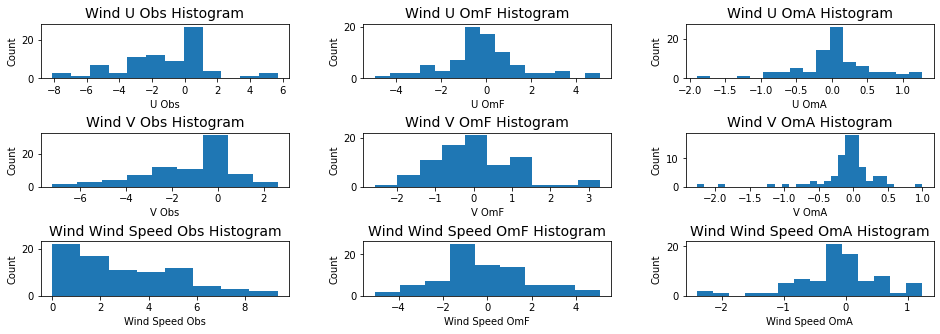

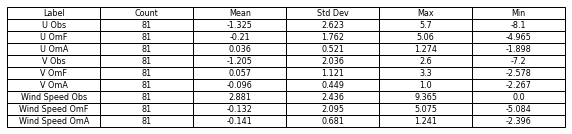

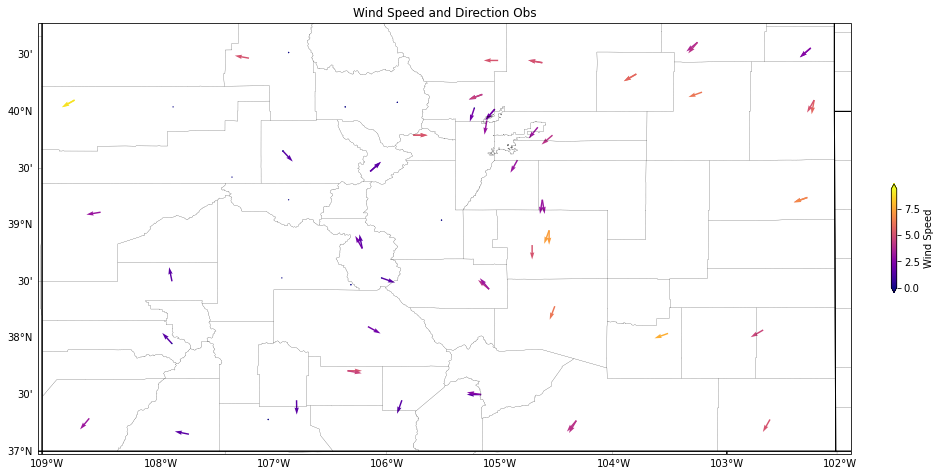

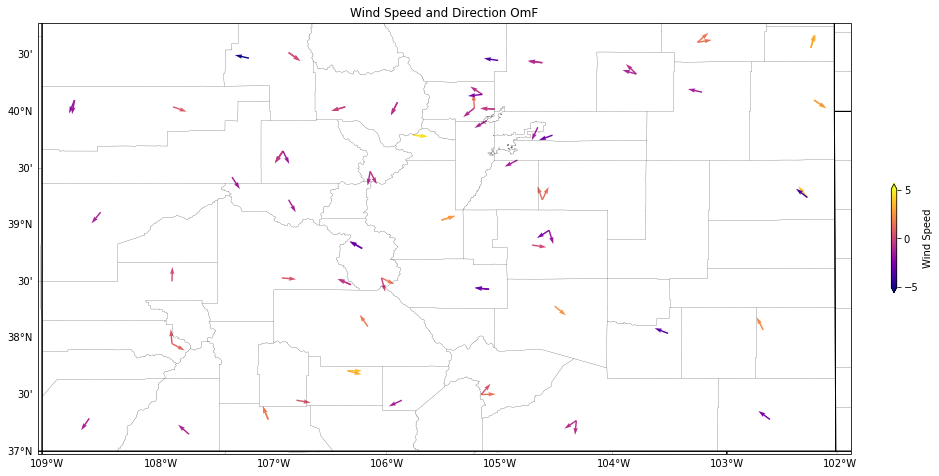

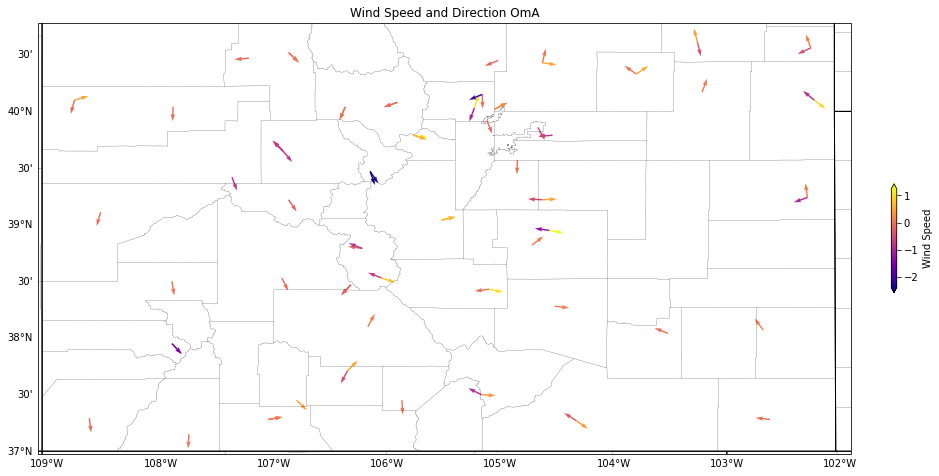

In [31]:
make_wind_base_plots([df_uv_ges_fil, df_uv_anl_fil], diag_uv_ges.metadata)

# JEDI hofx files
This same workflow can be done for JEDI hofx file with some more small changes, for example the JEDI diagnostics are all in one file instead of two like GSI. So you only have to read, filter, and pass one df. There are also some small syntactic differences, please see the notebook titled jedi_diag_explore for an example reading, filtering and making plots using JEDI files